# Text Classifier 

### Lady Oñate - 200814451

### Johan Suarez - 200713010

In [157]:
# Import the libraries needed.
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer

In [158]:
# Define the path or directory where the data is
path  =  './'

In [159]:
# Import the cvs files to contain the plot info from the movies
dataTraining = pd.read_csv(os.path.join(path, 'data', 'dataTraining.csv'), encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv(os.path.join(path, 'data', 'dataTesting.csv'), encoding='UTF-8', index_col=0)

In [223]:
dataTraining.shape, dataTesting.shape

((7895, 5), (3383, 3))

In [161]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [162]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [163]:
# Show if we have missing values in the variables.
dataTraining.isnull().sum()

year      0
title     0
plot      0
genres    0
rating    0
dtype: int64

### Modify the variable Y

In [164]:
### Become the target vector into a matrix with 1 and 0
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [165]:
y_genres.shape

(7895, 24)

### Split the data into train and test 

In [166]:
X=dataTraining['plot']

In [167]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X, y_genres, test_size=0.33, random_state=42)

In [168]:
X_train.shape, y_train_genres.shape

((5289,), (5289, 24))

# Preprocessing of the plot information 

We tried different methods in order to take the reviews of plot from the movies to variables which allow us to fit a model

### Tokenization

In [149]:
vect = CountVectorizer()
X_dtm = vect.fit_transform(X_train)

In [150]:
X_dtm.shape

(5289, 32102)

### ngrams

In [115]:
vect = CountVectorizer(ngram_range=(1, 3), max_features=2000, stop_words='english')
X_dtm = vect.fit_transform(X_train)
X_dtm.shape

(5289, 2000)

### StopWords 

In [147]:
vect = CountVectorizer(stop_words='english')

In [148]:
X_dtm = vect.fit_transform(X_train)
X_dtm.shape

(7895, 38370)

### Stemming

In [208]:
# initialize stemmer
stemmer = SnowballStemmer('english')

# define a function that accepts text and returns a list of stemmer
def split_into_stemming(text):
    text = text.lower()
    words = text.split()
    return [stemmer.stem(word) for word in words]

In [209]:
vect = CountVectorizer(analyzer=split_into_stemming)
X_dtm=vect.fit_transform(X_train)

In [210]:
X_dtm.shape

(5289, 22324)

### Lemmatization

In [40]:
from nltk.stem  import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [41]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Andres Piraban
[nltk_data]     Acero\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [42]:
# define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

In [43]:
# use split_into_lemmas as the feature extraction function (WARNING: SLOW!)
vect = CountVectorizer(analyzer=split_into_lemmas)
X_dtm=vect.fit_transform(X_train)

In [44]:
X_dtm.shape

(7895, 34629)

### TfidfVectorizer

In [51]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [53]:
# TfidfVectorizer
vect = TfidfVectorizer()
X_dtm=pd.DataFrame(vect.fit_transform(X_train).toarray(), columns=vect.get_feature_names())

In [54]:
X_dtm.shape

(7895, 38672)

# Fit the Random Forest Model

In [ ]:
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))

In [ ]:
clf.fit(X_dtm, y_train_genres)

### Predict with Random Forest model 

In [220]:
y_pred_genres = clf.predict_proba(X_test)

In [221]:
y_pred_genres

array([[0.13538048, 0.11285281, 0.02477651, ..., 0.23261367, 0.03596354,
        0.02129276],
       [0.1558369 , 0.13616953, 0.02502456, ..., 0.22492469, 0.14489345,
        0.02147267],
       [0.18746419, 0.14939309, 0.02477651, ..., 0.25903414, 0.0360474 ,
        0.02183461],
       ...,
       [0.17724405, 0.11380306, 0.02477651, ..., 0.24035087, 0.03369227,
        0.02144176],
       [0.14083879, 0.11935931, 0.02454238, ..., 0.26311518, 0.03401384,
        0.02147267],
       [0.14260368, 0.11132798, 0.02477651, ..., 0.24958018, 0.03369227,
        0.02281044]])

In [222]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.8110263307943478

### Results from Random Forest Model


ngrams = 0.7437754044790014

Stopwords = 0.787135570163806

Stemming = 0.8110263307943478

Lemmatization = 0.808024718893061

TfidfVectorizer = 0.8041688243111283

LSTM = 0.5002294470558991


# Create the CNN Model

AS we did with the random forest, we try the CNN with the best two pre processing methods: ngrams with stopwords and stemming.

Results: We found the stemming (82%) performed a little better than the ngrams(80%).

In [46]:
# Import the needed libraries to initiallize the CNN
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import History
from keras.optimizers import SGD
from keras.layers import Conv1D
from keras.layers import Activation, Dropout, Flatten, Dense

In [172]:
# Give the number of features of the data
dim_input = X_dtm.shape[1:]

In [173]:
dim_input

(22324,)

In [174]:
# Initiallize the CNN 
model = Sequential()
model.add(Dense(512, input_shape=dim_input))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 512)               11430400  
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dense_40 (Dense)             (None, 128)               65664     
_________________________________________________________________
activation_13 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_14 (Activation)   (None, 64)                0         
__________

In [175]:
y_train_genres.shape

(5289, 24)

In [176]:
#Compiling the model and set the optimizar, metrics and loss cost.
from keras.optimizers import rmsprop
from keras.optimizers import Adamax
model.compile(loss = 'categorical_crossentropy',
              optimizer = rmsprop(lr=0.001),
              metrics = ['accuracy'])

In [211]:
# Fit the CNN with the train data
epochs = 5
model.fit(X_dtm, y_train_genres,
                    epochs=epochs,
                    verbose=2)
                    

Epoch 1/5
 - 43s - loss: 4.2374 - acc: 0.4542
Epoch 2/5
 - 42s - loss: 4.1639 - acc: 0.4542
Epoch 3/5
 - 42s - loss: 4.1320 - acc: 0.4589
Epoch 4/5
 - 43s - loss: 4.0967 - acc: 0.4566
Epoch 5/5
 - 42s - loss: 4.0245 - acc: 0.4504


In [178]:
# We validate the CNN model with the test data
x_dtm_test=vect.transform(X_test)

y_pred_genres_stemmer = model.predict(x_dtm_test)
auc_stemmer=roc_auc_score(y_test_genres, y_pred_genres_stemmer, average='macro')

#y_pred_genres_ngrams = model.predict(x_dtm_test)
#auc_grams=roc_auc_score(y_test_genres, y_pred_genres_ngrams, average='macro')

In [180]:
auc_grams, auc_stemmer

(0.8022567084875906, 0.8212741714970369)

In [217]:
x_dtm_test=vect.transform(X_test)

history=model.fit(X_dtm, y_train_genres, validation_data=[x_dtm_test, y_test_genres], 
           epochs=50, verbose=3)

Train on 5289 samples, validate on 2606 samples
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [215]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


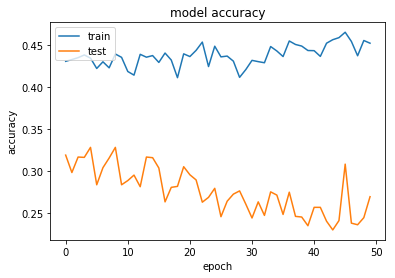

In [218]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Create a RNN model

We tried a RNN model, using LSTM with a default vocabulary, the same from the exercise 9. The top words was 5000. 

### LSTM

In [188]:
# Import the vocabulary
from keras.datasets.imdb import get_word_index

top_words = 5000
index_from = 3

vocab = get_word_index()

vocab = {k:(v+index_from) for k,v in vocab.items()}
vocab["<PAD>"] = 0
vocab["<START>"] = 1
vocab["<UNK>"] = 2

In [189]:
{k:vocab[k] for k in list(vocab.keys())[:10]}

# Max len
max_url_len = 150
X = [x[:max_url_len] for x in X_train]
# Convert characters to int and pad
X = [[vocab[x1] for x1 in x if x1 in vocab.keys()] for x in X_train]

In [191]:
# This code allows to cut the index word in 5000, there is no word with index above 5000.
X_reviews=[]
review_=[]

for plot in X:
    for i in plot:
        idx=i
        if i>=5000:
            idx=2
        review_.append(idx)
    
    X_reviews.append(review_)

In [199]:
from keras.preprocessing import sequence
X_dtm = sequence.pad_sequences(X_reviews, maxlen=max_url_len)

In [200]:
from keras.layers.embeddings import Embedding
from keras.layers import LSTM

model2 = Sequential()
model2.add(Embedding(top_words,32,input_length=max_url_len))
model2.add(LSTM(100))
model2.add(Dropout(0.5))
model2.add(Dense(24, activation='sigmoid'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 150, 32)           160000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_18 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 24)                2424      
Total params: 215,624
Trainable params: 215,624
Non-trainable params: 0
_________________________________________________________________


In [201]:
model2.compile(loss = 'categorical_crossentropy',
              optimizer = rmsprop(lr=0.001),
              metrics = ['accuracy'])

In [202]:
# Fit the RNN with the train data
epochs = 3
model2.fit(X_dtm, y_train_genres,
                    epochs=epochs,
                    verbose=2)
                    

Epoch 1/3
 - 24s - loss: 7.6232 - acc: 0.2089
Epoch 2/3
 - 28s - loss: 7.5009 - acc: 0.1998
Epoch 3/3
 - 22s - loss: 7.4690 - acc: 0.2002


### Predict RNN

In [203]:
# Max len
Xtest = [x[:max_url_len] for x in X_test]
# Convert characters to int and pad
Xtest = [[vocab[x1] for x1 in x if x1 in vocab.keys()] for x in X_test]

In [204]:
# This code allows to cut the index word in 5000, there is no word with index above 5000.
X_reviewst=[]
reviewt_=[]

for plot in Xtest:
    for i in plot:
        idx=i
        if i>=5000:
            idx=2
        reviewt_.append(idx)
    
    X_reviewst.append(review_)

In [206]:
# We validate the CNN model with the test data
X_dtm_test2 = sequence.pad_sequences(X_reviewst, maxlen=max_url_len)

y_pred_genres_rnn = model2.predict(X_dtm_test2)
auc_rnn=roc_auc_score(y_test_genres, y_pred_genres_rnn, average='macro')


In [207]:
auc_rnn

0.5

### Another RNN taken from http://www.developintelligence.com/blog/2017/06/practical-neural-networks-keras-classifying-yelp-reviews/

AS part of the research on internet, we found the next model in order to improve our CNN, but the resul was not what we expected.

In [93]:
from keras.preprocessing.text import Tokenizer

from keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, Dropout, Activation
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [101]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)

In [103]:
padded_sequences = pad_sequences(sequences,maxlen=300)

In [104]:
padded_sequences

array([[   0,    0,    0, ...,  653,   12,   45],
       [   0,    0,    0, ...,    3,  298,   77],
       [ 209,  202,   25, ...,  460,    2,   33],
       ...,
       [   0,    0,    0, ...,   12,    1, 6149],
       [   0,    0,    0, ..., 1780,   49,  524],
       [   0,    0,    0, ...,  170, 1008,   87]])

In [108]:
model = Sequential()
model.add(Embedding(20000, 128, input_length=300))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(24, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [112]:
model = Sequential()
model.add(Embedding(20000, 128, input_length=300))
model.add(Dropout(0.2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(24, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [113]:
model.fit(padded_sequences, y_train_genres,epochs=1)

Epoch 1/1
5289/5289 [==============================] - 56s 11ms/step - loss: 7.5232 - acc: 0.1978


### Predict the test data

In [223]:
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = clf.predict_proba(X_test_dtm)

pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_genres_text_RF.csv', index_label='ID')